In [12]:
import sys
import os
import numpy as np
import cortex
import matplotlib.pyplot as plt
import pickle
from nilearn.plotting import view_img
import nibabel as nib
import subprocess as sp
import shlex



In [13]:
betameandiff_img_72 = pickle.load(open('/tank/shared/2022/arrow_of_time/arrow_of_time/aot/analysis/glmsingle/outputon7_voxels/average_distance_map_72.pkl','rb'))
betameandiff_img_90 = pickle.load(open('/tank/shared/2022/arrow_of_time/arrow_of_time/aot/analysis/glmsingle/outputon7_voxels/average_distance_map_90.pkl','rb'))
betameandiff_img_80 = pickle.load(open('/tank/shared/2022/arrow_of_time/arrow_of_time/aot/analysis/glmsingle/outputon7_voxels/average_distance_map_80.pkl','rb'))
R2_img_all = nib.load('/tank/shared/2022/arrow_of_time/arrow_of_time/aot/analysis/glmsingle/code/all_R2.nii.gz')
betameandiff_data_72 = betameandiff_img_72#.get_fdata()
betameandiff_data_90 = betameandiff_img_90#.get_fdata()
betameandiff_data_80 = betameandiff_img_80#.get_fdata()
R2_data_all = R2_img_all.get_fdata()

print('betameandiff_data_72.shape:',betameandiff_data_72.shape)
print('betameandiff_data_90.shape:',betameandiff_data_90.shape)
print('betameandiff_data_80.shape:',betameandiff_data_80.shape)



betameandiff_data_72.shape: (90, 105, 85)
betameandiff_data_90.shape: (90, 105, 85)
betameandiff_data_80.shape: (90, 105, 85)


In [14]:
orig_image_fn = '/tank/shared/2022/arrow_of_time/preproc7/sub-001/ses-pilot/func/sub-001_ses-pilot_task-90_acq-nordic_run-01_space-T1w_desc-preproc_bold.nii.gz'
bg_image_fn = '/tank/shared/2022/arrow_of_time/preproc7/sub-001/ses-pilot/func/sub-001_ses-pilot_task-90_acq-nordic_run-01_space-T1w_boldref.nii.gz'
bm_image_fn = '/tank/shared/2022/arrow_of_time/preproc7/sub-001/ses-pilot/func/sub-001_ses-pilot_task-90_acq-nordic_run-01_space-T1w_desc-brain_mask.nii.gz'
r2mask = R2_data_all > 25
bmask = nib.load(bm_image_fn).get_fdata().astype(bool)
bmask = np.logical_and(bmask, r2mask)
def mask(data,bmask = bmask):
    maskeddata = np.zeros_like(data)
    maskeddata[bmask] = data[bmask]
    return maskeddata

In [15]:


'''
betameandiff_data_72 = np.zeros_like(betameandiff_data_72)
dif_72_masked[bmask] = dif_72[bmask]
dif_90_masked = np.zeros_like(dif_90)
dif_90_masked[bmask] = dif_90[bmask]
dif_80_masked = np.zeros_like(dif_80)
dif_80_masked[bmask] = dif_80[bmask]
dif_7290_masked = np.zeros_like(dif_7290)
dif_7290_masked[bmask] = dif_7290[bmask]
'''
orig_image = nib.load(orig_image_fn)

dif_72_img = nib.Nifti1Image(mask(betameandiff_data_72),affine=orig_image.affine, header=orig_image.header)
dif_90_img = nib.Nifti1Image(mask(betameandiff_data_90),affine=orig_image.affine, header=orig_image.header)
dif_80_img = nib.Nifti1Image(mask(betameandiff_data_80),affine=orig_image.affine, header=orig_image.header)
dif_7290_img = nib.Nifti1Image(mask(betameandiff_data_72-betameandiff_data_90),affine=orig_image.affine, header=orig_image.header)
dif_8090_img = nib.Nifti1Image(mask(betameandiff_data_80-betameandiff_data_90),affine=orig_image.affine, header=orig_image.header)
dif_7280_img = nib.Nifti1Image(mask(betameandiff_data_72-betameandiff_data_80),affine=orig_image.affine, header=orig_image.header)


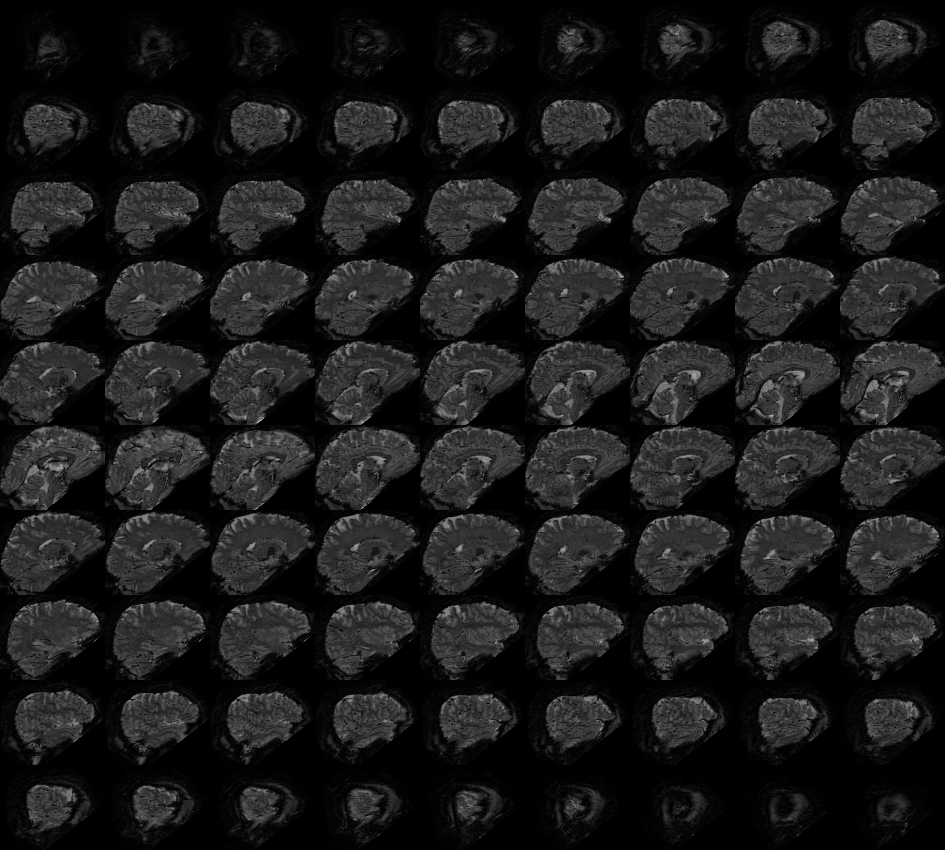
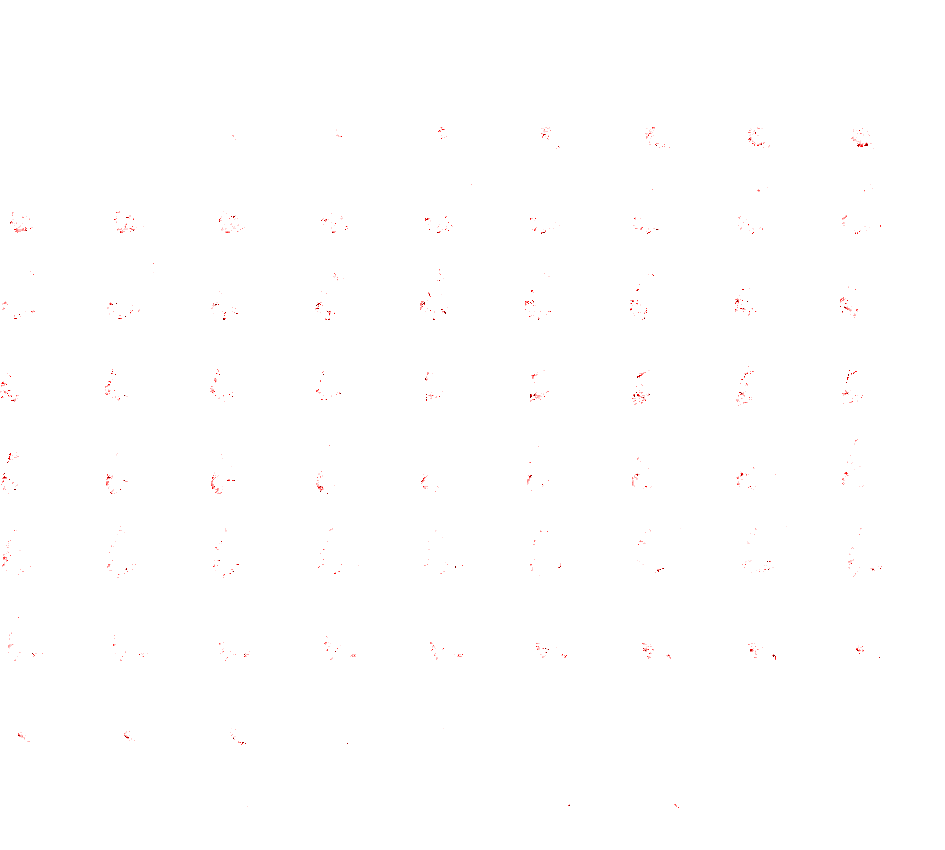

In [16]:
view_img(dif_72_img, cmap='seismic', symmetric_cmap=True, bg_img=bg_image_fn, vmax = 10)


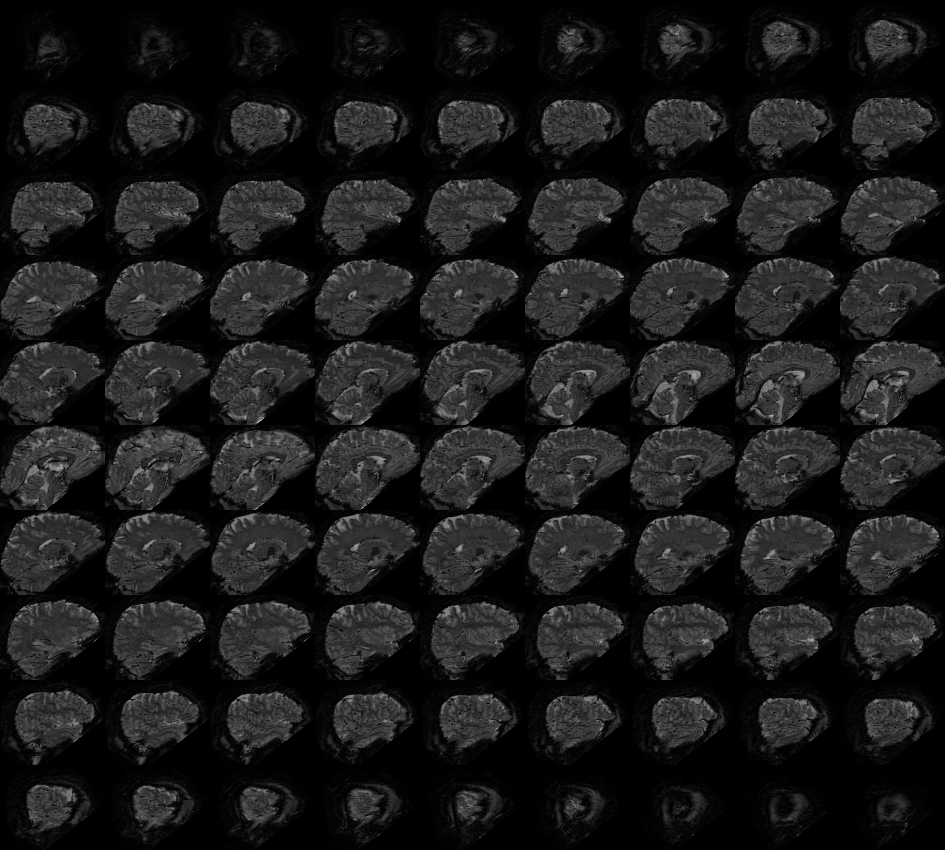
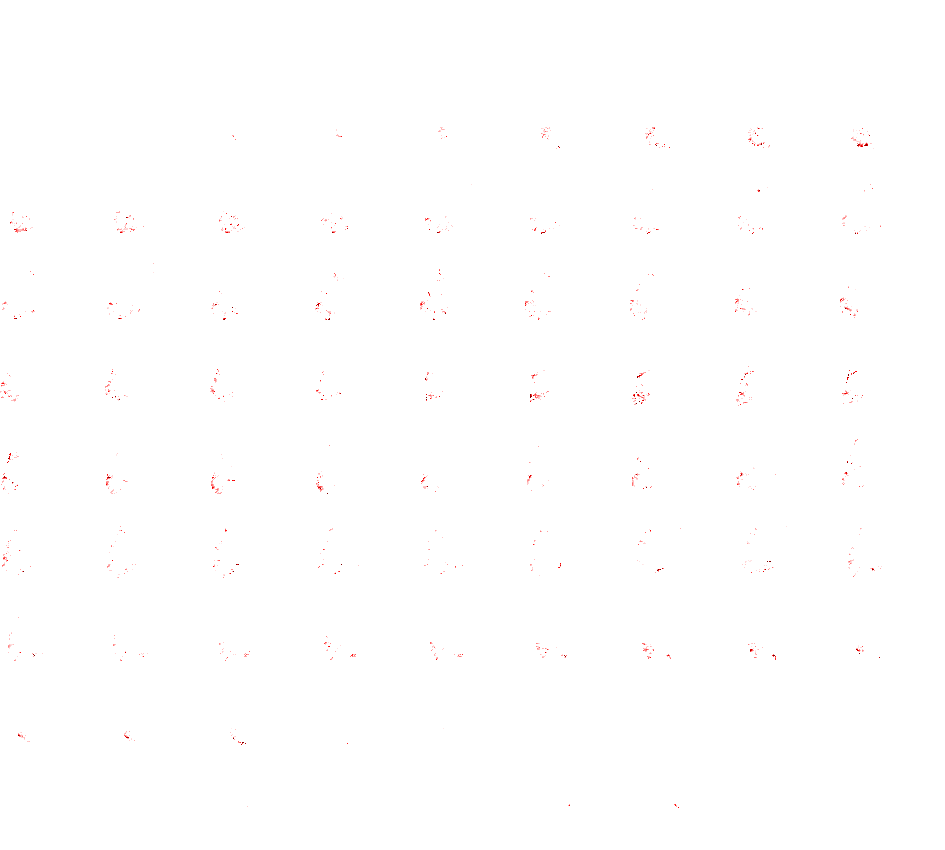

In [17]:
view_img(dif_90_img, cmap='seismic', symmetric_cmap=True, bg_img=bg_image_fn,vmax = 10)


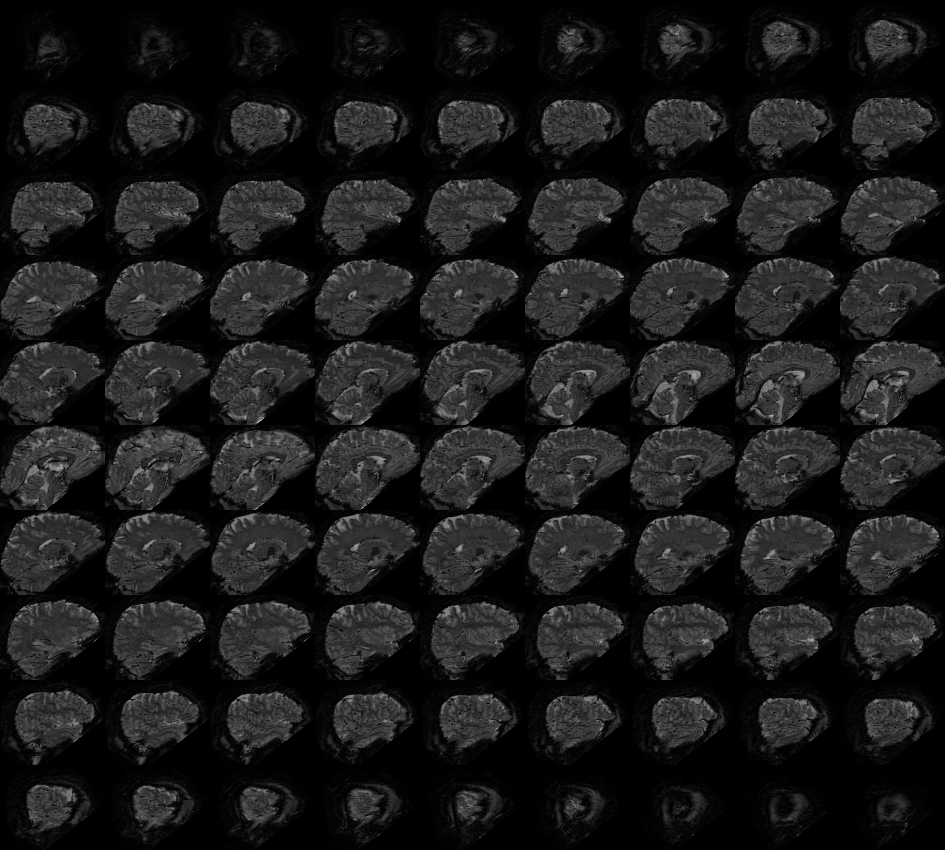
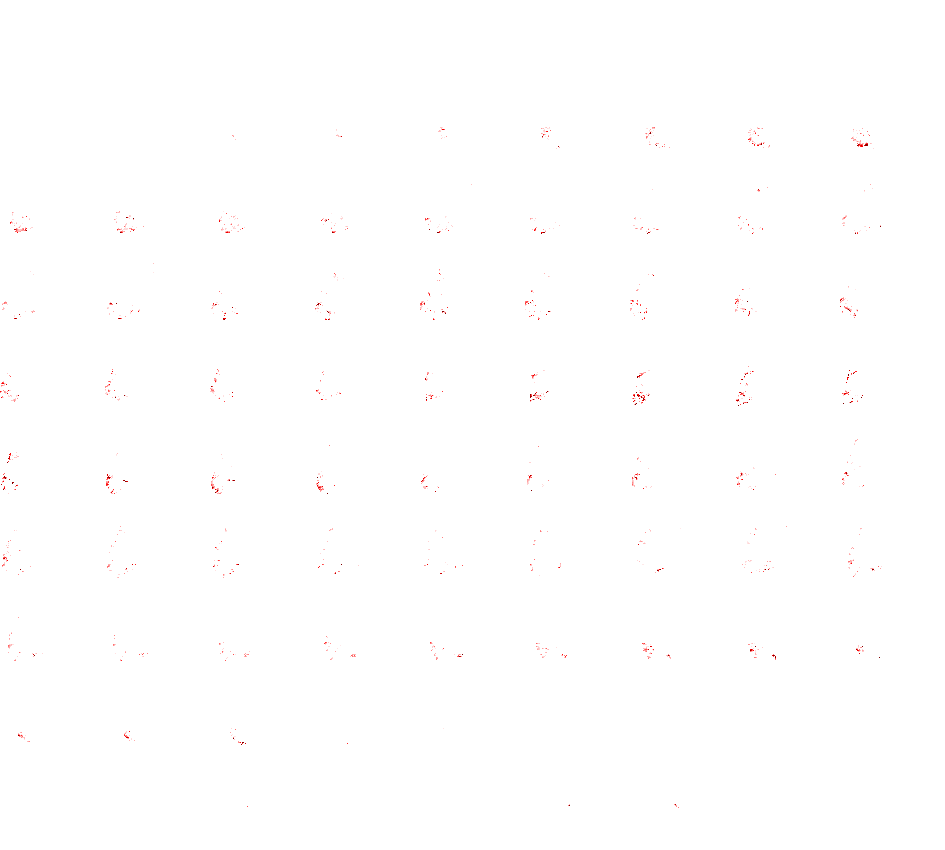

In [18]:
view_img(dif_80_img, cmap='seismic', symmetric_cmap=True, bg_img=bg_image_fn,vmax = 10)

/tank/zhangs/anaconda3/lib/python3.9/site-packages/nilearn/plotting/html_document.py:59: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



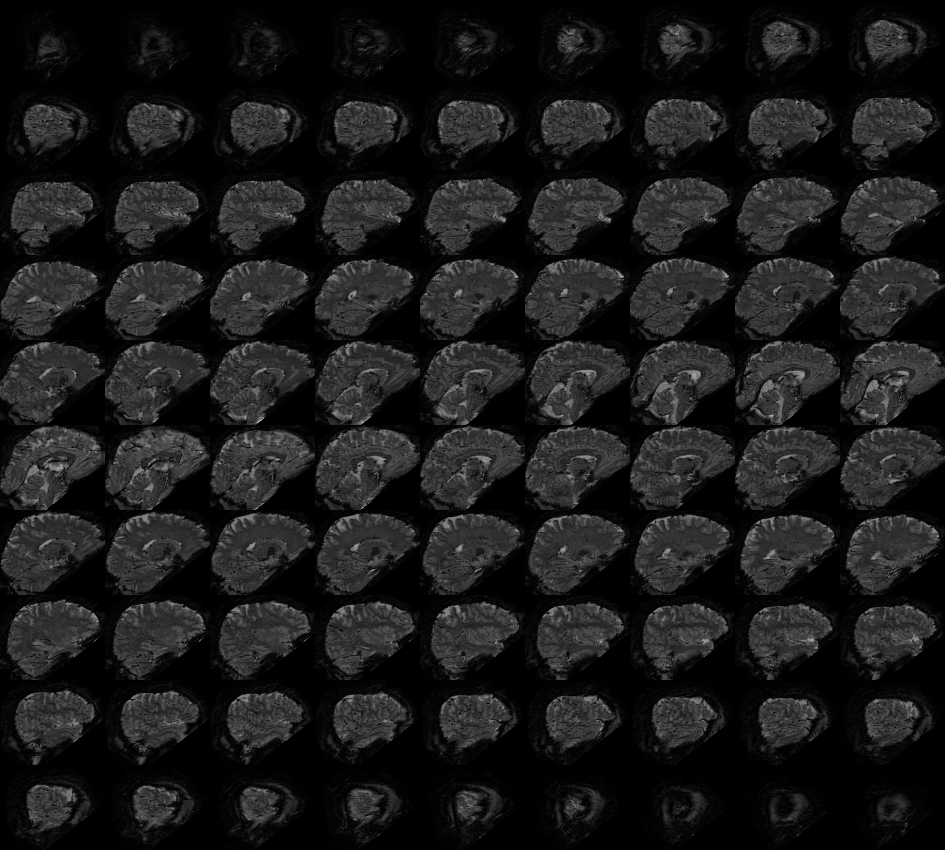
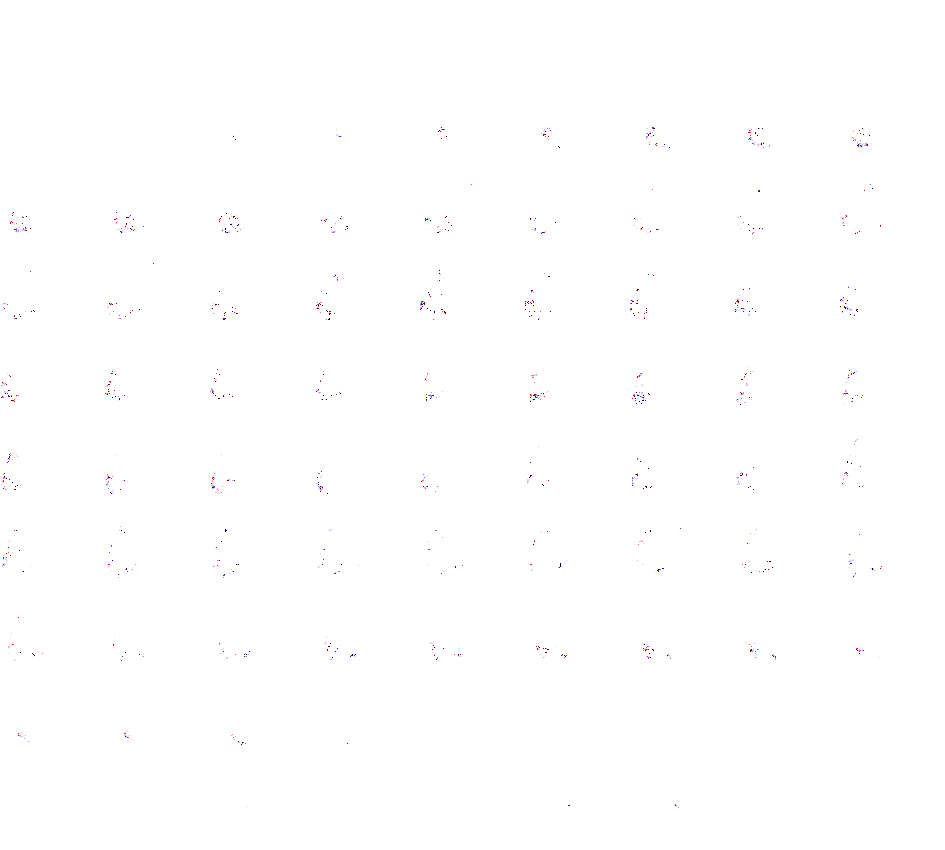

In [19]:
view_img(dif_7290_img, cmap='seismic', symmetric_cmap=True, bg_img=bg_image_fn,vmax = 3)


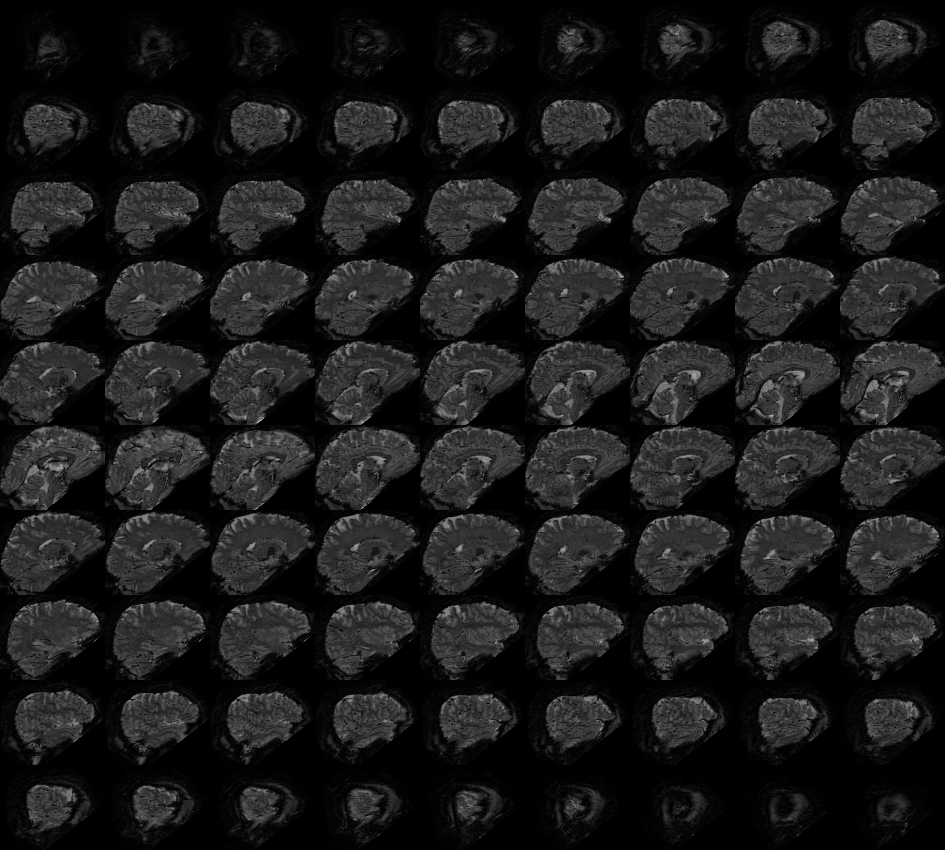
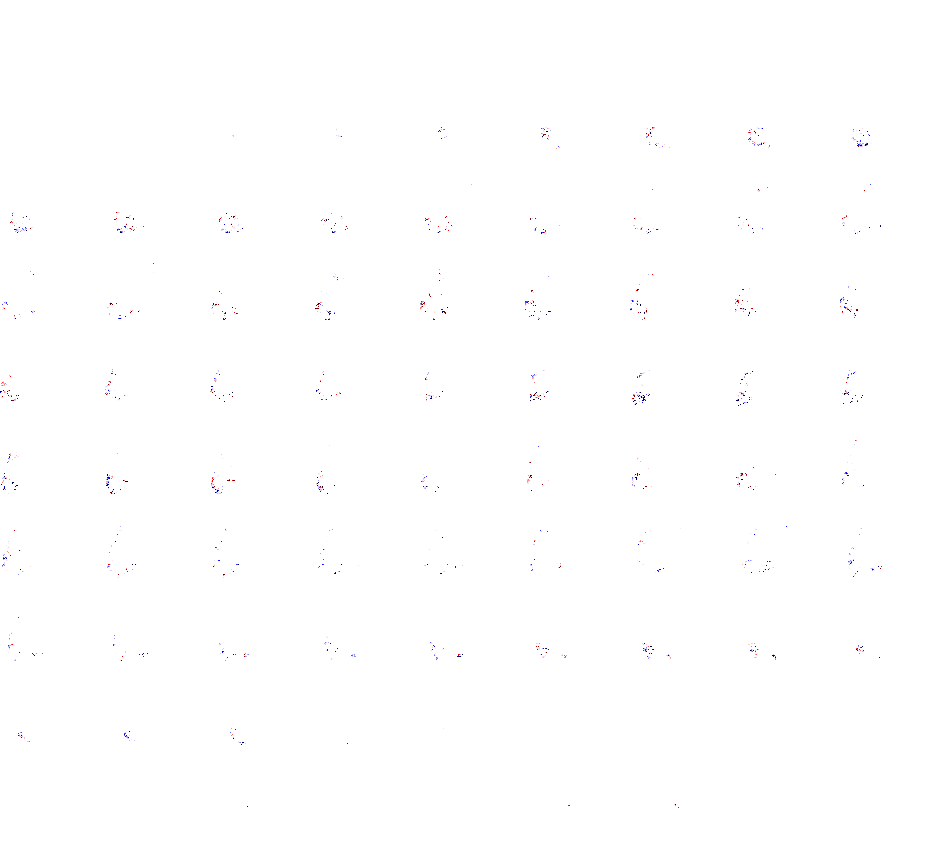

In [20]:
view_img(dif_7280_img, cmap='seismic', symmetric_cmap=True, bg_img=bg_image_fn,vmax = 3)


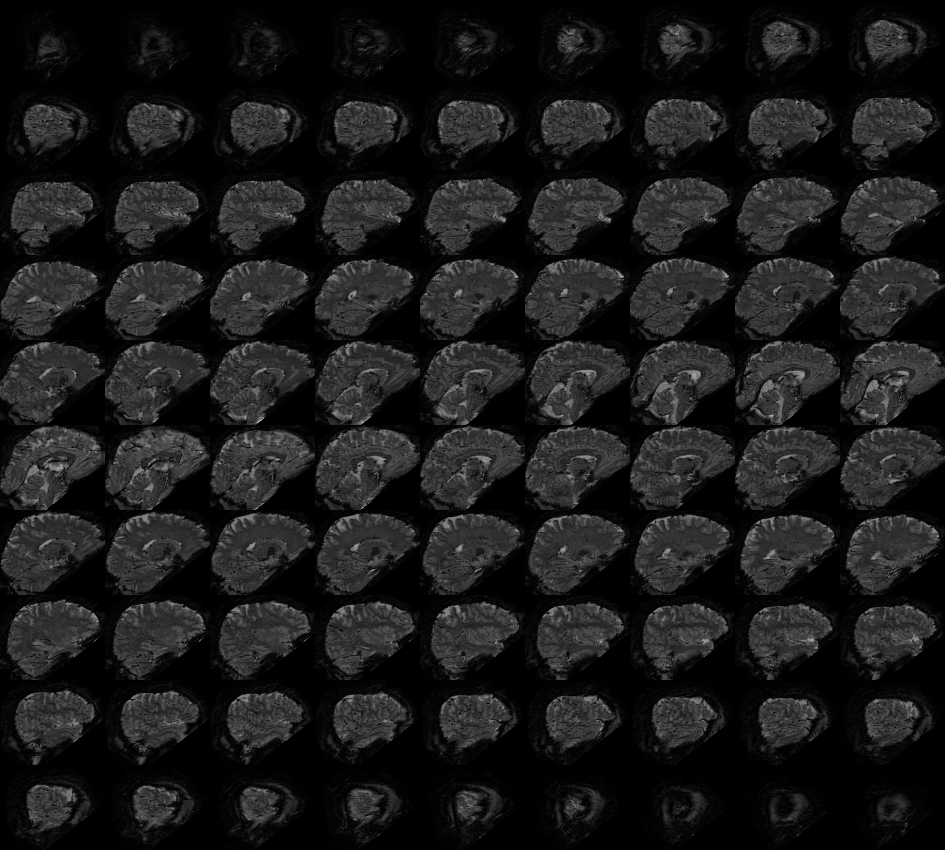
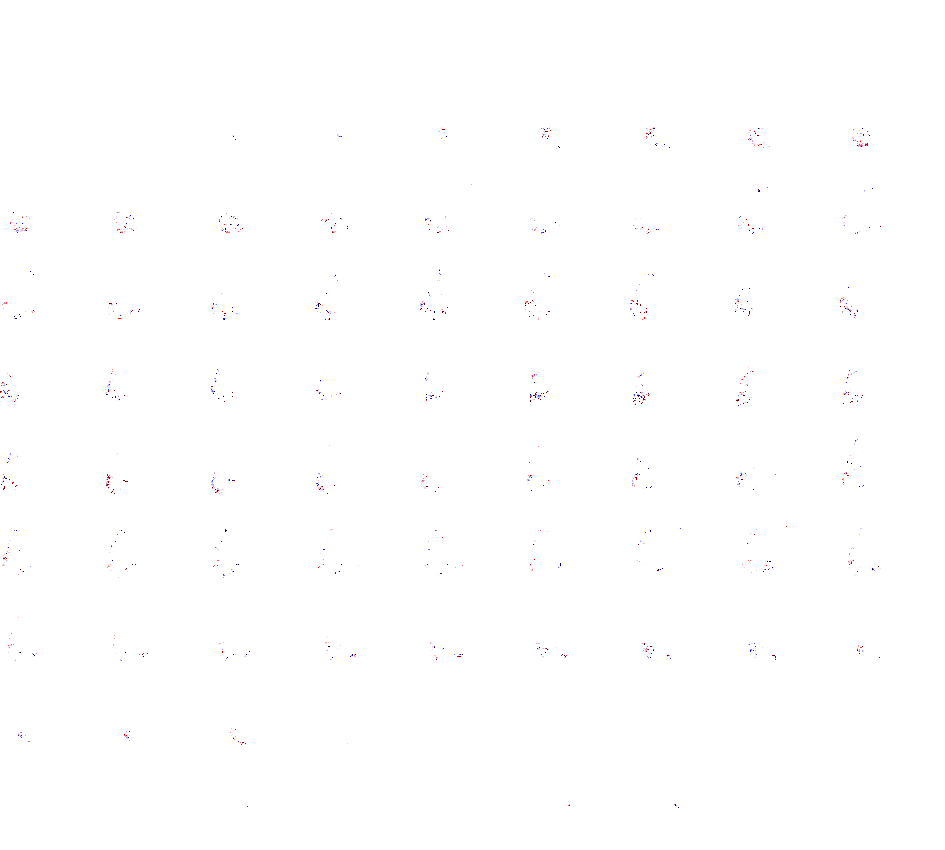

In [21]:
view_img(dif_8090_img, cmap='seismic', symmetric_cmap=True, bg_img=bg_image_fn,vmax = 3)

ValueError: x must have 2 or fewer dimensions

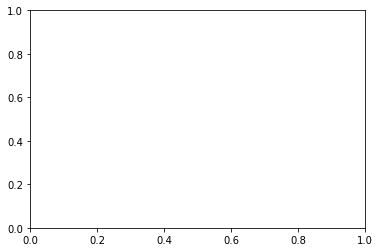

In [22]:
plt.hist(mask(betameandiff_data_72-betameandiff_data_90), bins=150, cumulative=False, histtype='step', density=True, label='72-90')
plt.legend()
plt.axvline(0)
plt.axvline(mask(betameandiff_data_72-betameandiff_data_90).mean(), color='k')